<h1>NN PRJCT - <b>Sam Omran 202010292</b></h1>

<h5><b>CIFAR-10 Dataset</b></h5>
<p>The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.</p>

<p>Extracting Files</p>

In [1]:
!tar -xf cifar-10-python.tar.gz

</p>Importing Libraries</p>

In [3]:
import os
import numpy as np
import pickle
import random
from tensorflow import squeeze
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AvgPool2D, Input
import matplotlib.pyplot as plt

In [4]:
def load_cifar10_batch(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
        X = dict[b'data']
        Y = dict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        Y = np.array(Y)
        return X, Y


In [5]:
def load_cifar10_data(data_dir):
    X_train = []
    Y_train = []
    
    for i in range(1, 6):
        file = os.path.join(data_dir, f'data_batch_{i}')
        X, Y = load_cifar10_batch(file)
        X_train.append(X)
        Y_train.append(Y)
    
    X_train = np.concatenate(X_train)
    Y_train = np.concatenate(Y_train)
    
    X_test, Y_test = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))
    
    return X_train, Y_train, X_test, Y_test


In [6]:
data_dir = 'cifar-10-batches-py'
X_train, Y_train, X_test, Y_test = load_cifar10_data(data_dir)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {Y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {Y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [8]:
random.seed(42)
random_indices = random.sample(range(X_train.shape[0]), 10000)

X_train_subset = X_train[random_indices]
Y_train_subset = Y_train[random_indices]

print(f"Subset training data shape: {X_train_subset.shape}")
print(f"Subset training labels shape: {Y_train_subset.shape}")

Subset training data shape: (10000, 32, 32, 3)
Subset training labels shape: (10000,)


<h3>First Experiment</h3>

In [9]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    AvgPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Conv2D(64, (4, 4), activation='relu', padding='valid', strides=(1, 1)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 5, 5, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 64)       │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,466 (247.91 KB)

 Trainable params: 63,466 (247.91 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
    X_train_subset,
    Y_train_subset,
    batch_size=60,
    epochs=300,
    validation_data=(X_test, Y_test)
)

Epoch 1/300
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2083 - loss: 2.1187 - val_accuracy: 0.3613 - val_loss: 1.7506
Epoch 2/300
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3644 - loss: 1.7366 - val_accuracy: 0.4124 - val_loss: 1.5871
Epoch 3/300
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4217 - loss: 1.5701 - val_accuracy: 0.4551 - val_loss: 1.5007
Epoch 4/300
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4683 - loss: 1.4730 - val_accuracy: 0.4688 - val_loss: 1.4782
Epoch 5/300
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.4810 - loss: 1.4415 - val_accuracy: 0.4986 - val_loss: 1.3863
Epoch 6/300
167/167 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.5171 - loss: 1.3415 - val_accuracy: 0.5007 - val_loss: 1.3895
Epoch 7/300
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.5339 - loss: 1.3068 - val_accuracy: 0.4944 - val_loss: 1.4324
Epoch 8/300
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5517 - loss: 1.2703 

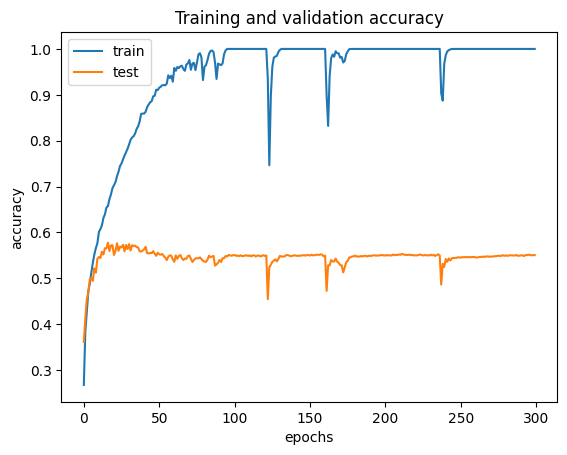

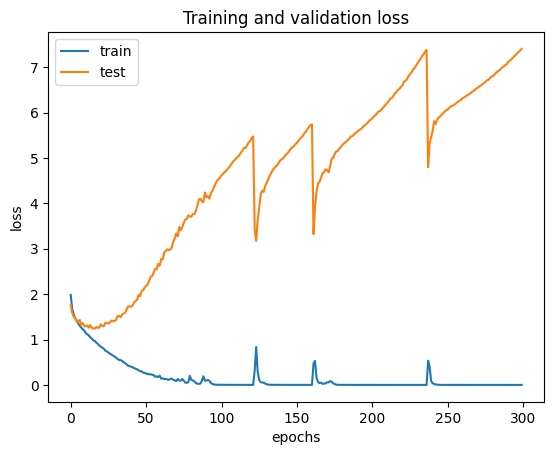

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(acc)
plt.plot(val_acc)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(loss)
plt.plot(val_loss)

plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Second Experiment</h2>

In [12]:
random.seed(42)
random_indices = random.sample(range(X_train.shape[0]), 20000)

X_train_subset2 = X_train[random_indices]
Y_train_subset2 = Y_train[random_indices]

print(f"Subset training data shape: {X_train_subset2.shape}")
print(f"Subset training labels shape: {Y_train_subset2.shape}")

Subset training data shape: (20000, 32, 32, 3)
Subset training labels shape: (20000,)


In [15]:
model2 = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    AvgPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Conv2D(64, (4, 4), activation='relu', padding='valid', strides=(1, 1)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [16]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history2 = model.fit(
    X_train_subset2,
    Y_train_subset2,
    batch_size=60,
    epochs=95,
    validation_data=(X_test, Y_test)
)

Epoch 1/95
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4974 - loss: 2.1510 - val_accuracy: 0.5095 - val_loss: 1.5543
Epoch 2/95
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6073 - loss: 1.1445 - val_accuracy: 0.5295 - val_loss: 1.4749
Epoch 3/95
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6668 - loss: 0.9782 - val_accuracy: 0.5509 - val_loss: 1.4660
Epoch 4/95
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6964 - loss: 0.8792 - val_accuracy: 0.5632 - val_loss: 1.4360
Epoch 5/95
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7412 - loss: 0.7679 - val_accuracy: 0.5652 - val_loss: 1.4586
Epoch 6/95
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7587 - loss: 0.7133 - val_accuracy: 0.5659 - val_loss: 1.5082
Epoch 7/95
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7785 - loss: 0.6546 - val_accuracy: 0.5718 - val_loss: 1.5048
Epoch 8/95
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7928 - loss: 0.6049 - val_accu

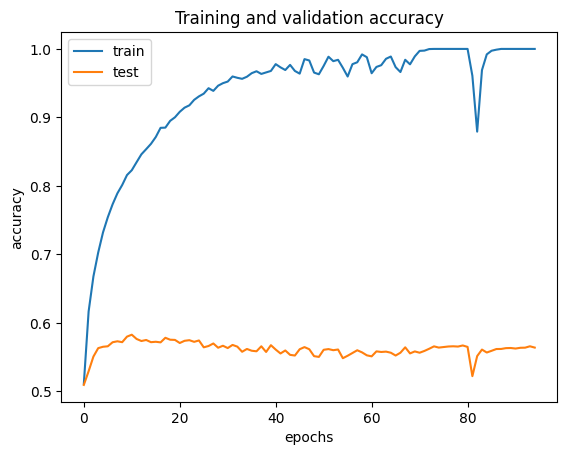

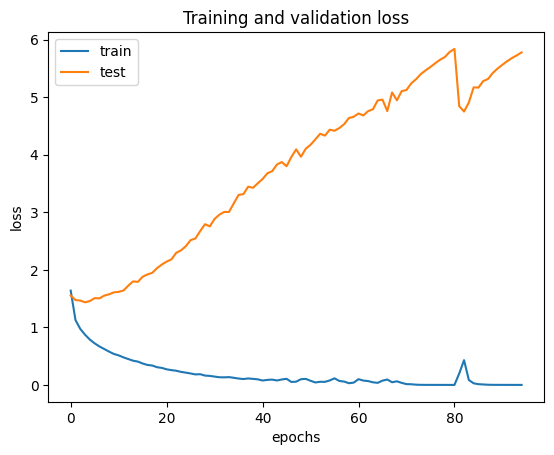

In [18]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
plt.plot(acc2)
plt.plot(val_acc2)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(loss2)
plt.plot(val_loss2)

plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Third Experiment<h3>

In [13]:
datagen = ImageDataGenerator(
    rotation_range=15,           
    width_shift_range=0.1,       
    height_shift_range=0.1,      
    horizontal_flip=True,        
    zoom_range=0.1,              
    shear_range=0.1              
)

train_generator = datagen.flow(X_train_subset2, Y_train_subset2, batch_size=60)

In [20]:
model3 = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    AvgPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Conv2D(64, (4, 4), activation='relu', padding='valid', strides=(1, 1)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [21]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history3 = model3.fit(
    train_generator,
    epochs=75,
    validation_data=(X_test, Y_test)
)

Epoch 1/75
  1/334 ━━━━━━━━━━━━━━━━━━━━ 6:22 1s/step - accuracy: 0.1000 - loss: 2.2862

c:\Users\sambo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.2007 - loss: 2.1264 - val_accuracy: 0.3902 - val_loss: 1.6922
Epoch 2/75
334/334 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.3764 - loss: 1.7287 - val_accuracy: 0.4369 - val_loss: 1.5443
Epoch 3/75
334/334 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.4169 - loss: 1.6079 - val_accuracy: 0.4669 - val_loss: 1.4609
Epoch 4/75
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.4444 - loss: 1.5386 - val_accuracy: 0.4749 - val_loss: 1.4369
Epoch 5/75
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.4542 - loss: 1.5002 - val_accuracy: 0.4856 - val_loss: 1.4149
Epoch 6/75
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.4590 - loss: 1.4914 - val_accuracy: 0.5056 - val_loss: 1.3593
Epoch 7/75
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.4723 - loss: 1.4547 - val_accuracy: 0.5077 - val_loss: 1.3694
Epoch 8/75
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.4861 - loss: 1.4166 - val_accurac

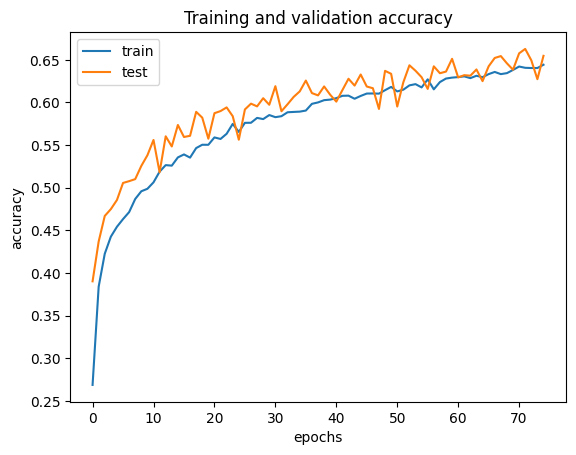

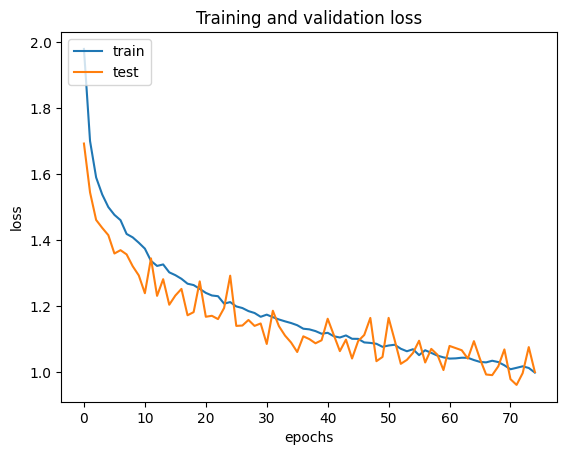

In [23]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
plt.plot(acc3)
plt.plot(val_acc3)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(loss3)
plt.plot(val_loss3)

plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Fourth Experiment</h2>

In [8]:
model4 = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    AvgPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Conv2D(64, (4, 4), activation='relu', padding='valid', strides=(1, 1)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [9]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history4 = model4.fit(
    train_generator,
    epochs=120,
    validation_data=(X_test, Y_test)
)

Epoch 1/120


c:\Users\sambo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


334/334 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.2219 - loss: 2.0689 - val_accuracy: 0.3847 - val_loss: 1.6418
Epoch 2/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.3901 - loss: 1.6624 - val_accuracy: 0.4591 - val_loss: 1.4743
Epoch 3/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.4301 - loss: 1.5583 - val_accuracy: 0.4864 - val_loss: 1.3976
Epoch 4/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.4630 - loss: 1.4725 - val_accuracy: 0.4923 - val_loss: 1.3982
Epoch 5/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4654 - loss: 1.4682 - val_accuracy: 0.5313 - val_loss: 1.2937
Epoch 6/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4886 - loss: 1.4184 - val_accuracy: 0.5217 - val_loss: 1.3087
Epoch 7/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.5020 - loss: 1.3822 - val_accuracy: 0.5187 - val_loss: 1.3202
Epoch 8/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.5168 - loss: 1.3585 - val_

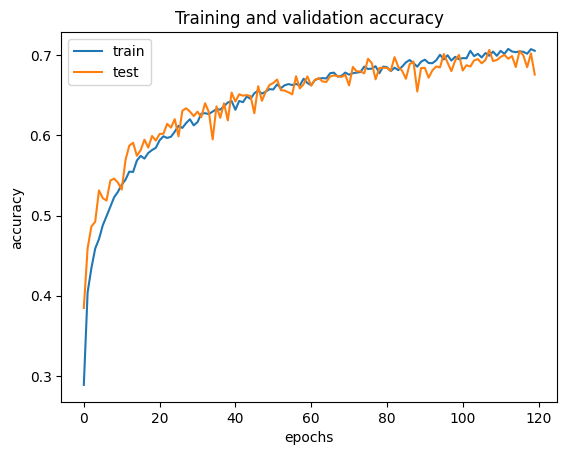

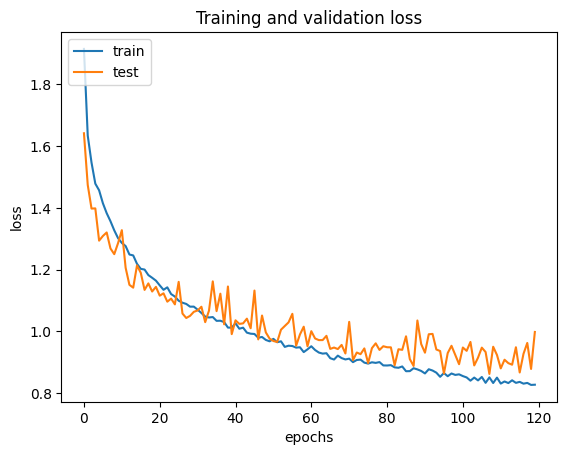

In [15]:
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
plt.plot(acc4)
plt.plot(val_acc4)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(loss4)
plt.plot(val_loss4)

plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Fifth Experiment</h2>

In [16]:
from tensorflow.keras.regularizers import l2

model5 = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1), kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    AvgPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Conv2D(64, (4, 4), activation='relu', padding='valid', strides=(1, 1)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [17]:
model5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 64)       │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,466 (247.91 KB)

 Trainable params: 63,466 (247.91 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history5 = model4.fit(
    train_generator,
    epochs=120,
    validation_data=(X_test, Y_test)
)

Epoch 1/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.7112 - loss: 0.8262 - val_accuracy: 0.7100 - val_loss: 0.8623
Epoch 2/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.7169 - loss: 0.8038 - val_accuracy: 0.6896 - val_loss: 0.9339
Epoch 3/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7045 - loss: 0.8260 - val_accuracy: 0.7148 - val_loss: 0.8595
Epoch 4/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7175 - loss: 0.8050 - val_accuracy: 0.7016 - val_loss: 0.9066
Epoch 5/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.7060 - loss: 0.8231 - val_accuracy: 0.6967 - val_loss: 0.9013
Epoch 6/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7134 - loss: 0.8130 - val_accuracy: 0.7020 - val_loss: 0.9034
Epoch 7/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7164 - loss: 0.8012 - val_accuracy: 0.6921 - val_loss: 0.9370
Epoch 8/120
334/334 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.7113 - loss: 0

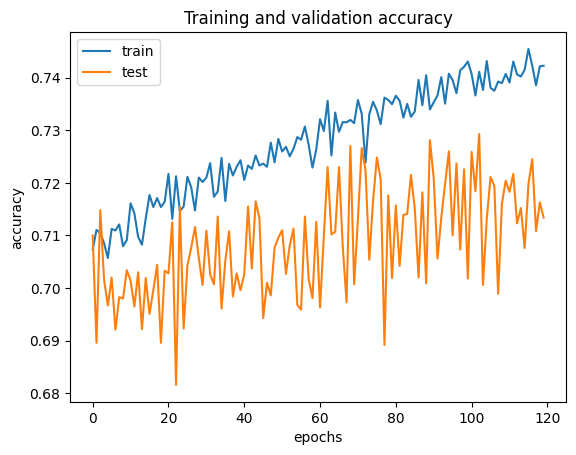

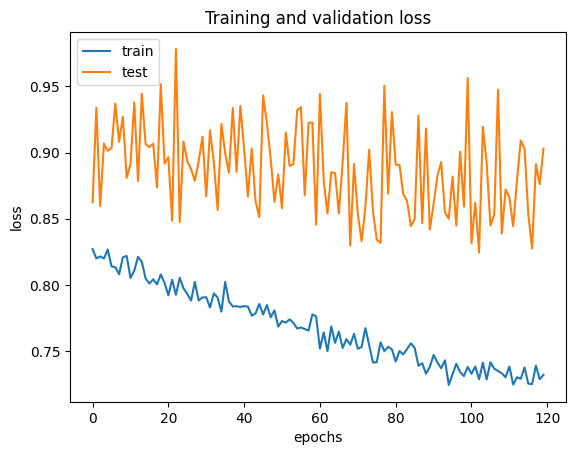

In [20]:
acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
plt.plot(acc5)
plt.plot(val_acc5)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(loss5)
plt.plot(val_loss5)

plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Sixth Experiment<h/2>

In [21]:
model6 = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(32, (5, 5), activation='relu', padding='valid', strides=(1, 1)),
    AvgPool2D(pool_size=(2, 2), padding='valid', strides=2),
    Conv2D(64, (4, 4), activation='relu', padding='valid', strides=(1, 1)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [22]:
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
final_data_generator = datagen.flow(X_train, Y_train, batch_size=75)

In [25]:
history6 = model6.fit(
    final_data_generator,
    epochs=120,
    validation_data=(X_test, Y_test),
)

Epoch 1/120


c:\Users\sambo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


667/667 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.2777 - loss: 1.9431 - val_accuracy: 0.4630 - val_loss: 1.4755
Epoch 2/120
667/667 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.4394 - loss: 1.5341 - val_accuracy: 0.4856 - val_loss: 1.4207
Epoch 3/120
667/667 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.4826 - loss: 1.4327 - val_accuracy: 0.5393 - val_loss: 1.2795
Epoch 4/120
667/667 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.5161 - loss: 1.3545 - val_accuracy: 0.5578 - val_loss: 1.2485
Epoch 5/120
667/667 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.5375 - loss: 1.3002 - val_accuracy: 0.5765 - val_loss: 1.1699
Epoch 6/120
667/667 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.5570 - loss: 1.2444 - val_accuracy: 0.6155 - val_loss: 1.0999
Epoch 7/120
667/667 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.5701 - loss: 1.2131 - val_accuracy: 0.5821 - val_loss: 1.1733
Epoch 8/120
667/667 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.5817 - loss: 1.1891 - val_

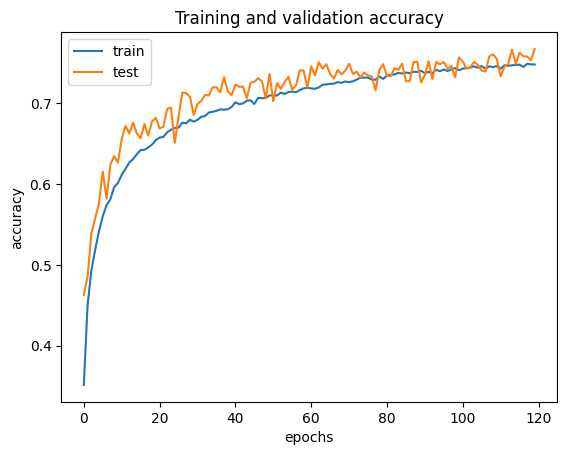

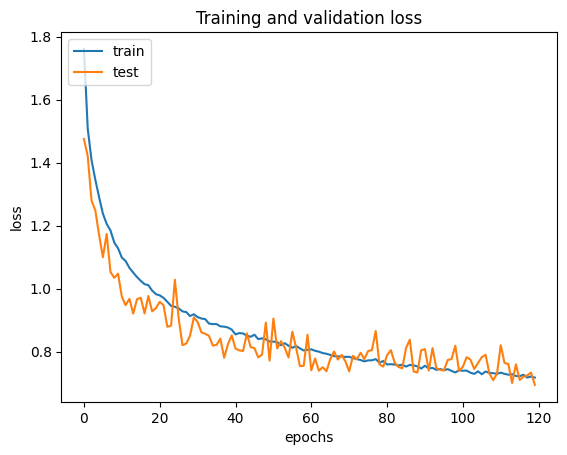

In [26]:
acc6 = history6.history['accuracy']
val_acc6 = history6.history['val_accuracy']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
plt.plot(acc6)
plt.plot(val_acc6)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(loss6)
plt.plot(val_loss6)

plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()